## 🍔 Food Image Classification (Transfer Learning)

Given *images of 101 different foods, let's try to classify the **food** present in a given image.

We will use a Tensorflow/Keras pretrained MobileNetV2 CNN to make our predictions.

Data source: https://www.kaggle.com/datasets/msarmi9/food101tiny

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

2025-04-21 09:33:33.854019: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
image_dir = Path('food-101')

### Create File DataFrame

In [3]:
filepaths = list(image_dir.glob(r'**/*.jpg'))
filepaths

[PosixPath('food-101/falafel/1099236.jpg'),
 PosixPath('food-101/falafel/1195908.jpg'),
 PosixPath('food-101/falafel/1607491.jpg'),
 PosixPath('food-101/falafel/1336658.jpg'),
 PosixPath('food-101/falafel/1381861.jpg'),
 PosixPath('food-101/falafel/1657900.jpg'),
 PosixPath('food-101/falafel/1498938.jpg'),
 PosixPath('food-101/falafel/1368021.jpg'),
 PosixPath('food-101/falafel/1298533.jpg'),
 PosixPath('food-101/falafel/1270489.jpg'),
 PosixPath('food-101/falafel/1242869.jpg'),
 PosixPath('food-101/falafel/1462028.jpg'),
 PosixPath('food-101/falafel/1673352.jpg'),
 PosixPath('food-101/falafel/1616534.jpg'),
 PosixPath('food-101/falafel/1256755.jpg'),
 PosixPath('food-101/falafel/1142219.jpg'),
 PosixPath('food-101/falafel/1504180.jpg'),
 PosixPath('food-101/falafel/1670.jpg'),
 PosixPath('food-101/falafel/1620299.jpg'),
 PosixPath('food-101/falafel/1418903.jpg'),
 PosixPath('food-101/falafel/1399193.jpg'),
 PosixPath('food-101/falafel/1336800.jpg'),
 PosixPath('food-101/falafel/156634

In [4]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'falafel',
 'fa

In [5]:
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

In [6]:
images = pd.concat([filepaths, labels], axis=1)
images

,Filepath,Label
0,food-101/falafel/1099236.jpg,falafel
1,food-101/falafel/1195908.jpg,falafel
2,food-101/falafel/1607491.jpg,falafel
3,food-101/falafel/1336658.jpg,falafel
4,food-101/falafel/1381861.jpg,falafel
...,...,...
1995,food-101/edamame/1183623.jpg,edamame
1996,food-101/edamame/1166187.jpg,edamame
1997,food-101/edamame/1358862.jpg,edamame
1998,food-101/edamame/1338105.jpg,edamame


In [7]:
image_df = images.sample(frac=1.0, random_state=5).reset_index(drop=True)
image_df

,Filepath,Label
0,food-101/falafel/1303207.jpg,falafel
1,food-101/cannoli/1070382.jpg,cannoli
2,food-101/ice_cream/1456899.jpg,ice_cream
3,food-101/ice_cream/1291046.jpg,ice_cream
4,food-101/bibimbap/1353748.jpg,bibimbap
...,...,...
1995,food-101/tiramisu/1115577.jpg,tiramisu
1996,food-101/ramen/1565944.jpg,ramen
1997,food-101/apple_pie/1295996.jpg,apple_pie
1998,food-101/french_toast/1154310.jpg,french_toast


In [8]:
image_df['Label'].value_counts()

Label
falafel         200
cannoli         200
ice_cream       200
bibimbap        200
french_toast    200
edamame         200
apple_pie       200
sushi           200
tiramisu        200
ramen           200
Name: count, dtype: int64

### Train Test Split

In [9]:
train_df, test_df = train_test_split(image_df, train_size=0.7, shuffle=True, random_state=6)

In [10]:
train_df.shape, test_df.shape

((1400, 2), (600, 2))

### Creating Generators

In [11]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [12]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode = 'rgb',
    class_mode = 'categorical',
    batch_size = 32,
    shuffle = True,
    seed = 42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode = 'rgb',
    class_mode = 'categorical',
    batch_size = 32,
    shuffle = True,
    seed = 42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode = 'rgb',
    class_mode = 'categorical',
    batch_size = 32,
    shuffle = False
)

Found 1120 validated image filenames belonging to 10 classes.
Found 280 validated image filenames belonging to 10 classes.
Found 600 validated image filenames belonging to 10 classes.


### Modeling

In [13]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

2025-04-21 09:33:36.692526: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [14]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

### Training

In [15]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

history = model.fit(
    train_images,
    validation_data = val_images,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100


2025-04-21 09:33:38.659629: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


35/35 [==============================] - ETA: 0s - loss: 1.3928 - accuracy: 0.5268  

2025-04-21 09:35:44.378567: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


35/35 [==============================] - 168s 5s/step - loss: 1.3928 - accuracy: 0.5268 - val_loss: 0.8173 - val_accuracy: 0.7250
Epoch 2/100
35/35 [==============================] - 153s 4s/step - loss: 0.5174 - accuracy: 0.8348 - val_loss: 0.6768 - val_accuracy: 0.7607
Epoch 3/100
35/35 [==============================] - 155s 4s/step - loss: 0.2923 - accuracy: 0.9179 - val_loss: 0.6642 - val_accuracy: 0.7964
Epoch 4/100
35/35 [==============================] - 165s 5s/step - loss: 0.1556 - accuracy: 0.9643 - val_loss: 0.6699 - val_accuracy: 0.8036
Epoch 5/100
35/35 [==============================] - 154s 4s/step - loss: 0.0893 - accuracy: 0.9848 - val_loss: 0.6864 - val_accuracy: 0.8000
Epoch 6/100
35/35 [==============================] - 155s 4s/step - loss: 0.0451 - accuracy: 0.9973 - val_loss: 0.6537 - val_accuracy: 0.8214
Epoch 7/100
35/35 [==============================] - 155s 4s/step - loss: 0.0227 - accuracy: 1.0000 - val_loss: 0.6585 - val_accuracy: 0.8036
Epoch 8/100
35/35 

### Results

In [16]:
results = model.evaluate(test_images)
print("Test Accuracy: {:.2f}%".format(results[1]*100))

2025-04-21 10:04:21.751354: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


19/19 [==============================] - 71s 4s/step - loss: 0.7784 - accuracy: 0.7700
Test Accuracy: 77.00%


In [17]:
predictions = np.argmax(model.predict(test_images), axis=1)
predictions

2025-04-21 10:06:06.098247: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


19/19 [==============================] - 71s 4s/step


array([6, 5, 2, 3, 0, 8, 1, 4, 0, 5, 0, 5, 3, 4, 1, 7, 9, 8, 0, 3, 2, 3,
       7, 4, 1, 8, 7, 4, 9, 3, 6, 0, 4, 6, 9, 3, 6, 9, 0, 2, 8, 5, 9, 0,
       1, 3, 0, 1, 2, 4, 1, 4, 0, 6, 8, 2, 0, 4, 0, 4, 6, 9, 6, 6, 3, 4,
       1, 9, 7, 2, 8, 1, 9, 4, 0, 7, 9, 3, 1, 2, 3, 1, 5, 1, 1, 5, 3, 1,
       8, 6, 3, 5, 6, 4, 3, 0, 6, 2, 2, 2, 6, 8, 8, 8, 5, 6, 5, 8, 3, 0,
       9, 8, 9, 2, 1, 4, 4, 4, 8, 9, 1, 2, 8, 9, 2, 0, 0, 5, 3, 3, 8, 4,
       2, 5, 3, 9, 8, 5, 6, 5, 8, 8, 9, 9, 0, 3, 0, 3, 6, 4, 1, 7, 4, 6,
       3, 0, 7, 6, 5, 3, 0, 1, 2, 4, 4, 2, 1, 0, 0, 4, 7, 5, 4, 4, 6, 6,
       1, 1, 9, 4, 6, 1, 2, 0, 6, 6, 1, 4, 7, 8, 4, 1, 8, 2, 0, 4, 7, 6,
       8, 3, 1, 2, 9, 2, 2, 0, 0, 1, 4, 5, 2, 0, 9, 5, 6, 4, 5, 5, 7, 2,
       2, 5, 3, 3, 7, 8, 8, 3, 7, 5, 0, 9, 8, 7, 9, 9, 4, 0, 3, 3, 9, 3,
       5, 5, 2, 9, 9, 7, 1, 5, 9, 5, 1, 5, 7, 7, 4, 8, 9, 0, 2, 1, 3, 1,
       2, 8, 2, 1, 2, 4, 1, 5, 8, 0, 2, 1, 8, 5, 3, 1, 8, 8, 4, 7, 2, 1,
       0, 9, 1, 7, 8, 2, 6, 7, 0, 3, 2, 4, 4, 8, 5,

In [22]:
cm = confusion_matrix(test_images.labels, predictions)
clr = classification_report(test_images.labels, predictions, target_names=test_images.class_indices)

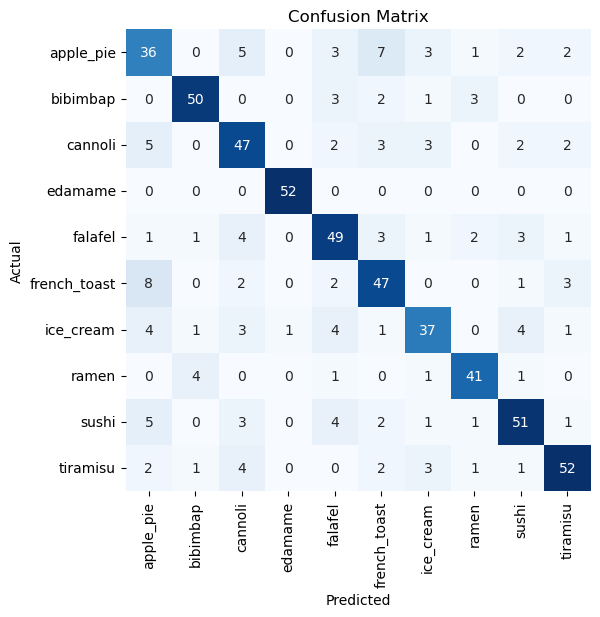

In [20]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(10)+0.5, labels=test_images.class_indices, rotation=90)
plt.yticks(ticks=np.arange(10)+0.5, labels=test_images.class_indices, rotation=0)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

In [23]:
print("Classification Report:\n-----------------------\n", clr)

Classification Report:
-----------------------
               precision    recall  f1-score   support

   apple_pie       0.59      0.61      0.60        59
    bibimbap       0.88      0.85      0.86        59
     cannoli       0.69      0.73      0.71        64
     edamame       0.98      1.00      0.99        52
     falafel       0.72      0.75      0.74        65
french_toast       0.70      0.75      0.72        63
   ice_cream       0.74      0.66      0.70        56
       ramen       0.84      0.85      0.85        48
       sushi       0.78      0.75      0.77        68
    tiramisu       0.84      0.79      0.81        66

    accuracy                           0.77       600
   macro avg       0.78      0.77      0.77       600
weighted avg       0.77      0.77      0.77       600

